Some plots and statistics on the OMXS30 dataset downloaded at

http://www.nasdaqomxnordic.com/index/historiska_kurser?languageId=3&Instrument=SE0000337842







In [738]:
"""Importing libraries and loading data."""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df= pd.read_excel('OMXS30data.xlsx')
pd.set_option('display.max_rows',None)



"""Renaming relevant columns."""

df=pd.DataFrame({"Date":df.loc[:,"Datum"],"Closing price": df.loc[:,"StÃ¤ngn.kurs"]})

In [739]:
"""Calculating daily returns and adding a column with daily returns to the main dataframe."""

def returns(x): 
    daily_rate_of_change=np.exp(-np.diff(np.log(x)))       # Combining logarithmic properties with the np.diff() function.
    return 100*(daily_rate_of_change-1)

returns=returns(np.array(df.loc[:,"Closing price"]))
df_returns=pd.DataFrame({"Return (%)":returns})
df.drop(df.tail(1).index,inplace=True)                     # Dropping the first trading day, since we do not know its return.
df["Return (%)"]=df_returns                                # Adding the returns to the main dataframe.

<ipython-input-739-f790520de308>:4: RuntimeWarning: divide by zero encountered in log
  daily_rate_of_change=np.exp(-np.diff(np.log(x)))       # Combining logarithmic properties with the np.diff() function.


In [740]:
"""Due to some entries in "Closing price" being 0, we obtain some rows with -100% return and consequently, 
the following trading day has an infinite return. This is what causes the RuntimeWarning above.
Here we filter out these datapoints."""

df=df[df["Return (%)"]!=np.inf] 
df=df[df["Return (%)"]!=-100] 

In [741]:
"""Some bacis statistics."""

df.describe()

,Closing price,Return (%)
count,8907.000000,8907.000000
mean,876.579224,0.042154
std,559.387410,1.415061
min,98.860000,-10.571047
25%,334.080000,-0.669287
50%,842.070000,0.071731
75%,1292.815000,0.773894
max,2456.170000,11.653310


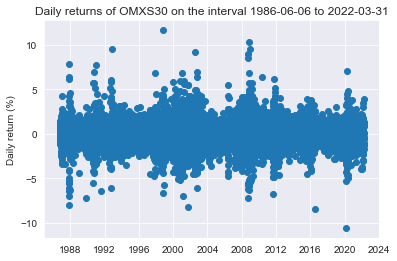

In [742]:
"""Plot of daily returns."""

returns=np.array(df.iloc[:, 2])
dates=df.iloc[:, 0]
plt.plot_date(dates, returns)
plt.title("Daily returns of OMXS30 on the interval 1986-06-06 to 2022-03-31")
plt.ylabel("Daily return (%)")
plt.show()

[Text(0.5, 0, 'Percentile (%)'), Text(0, 0.5, 'Daily return (%)')]

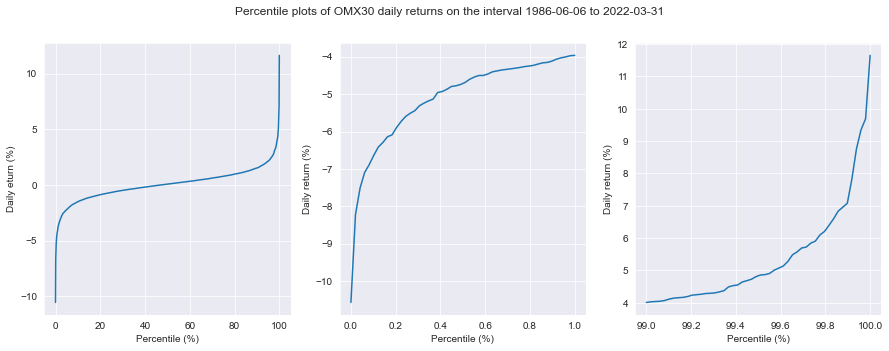

In [743]:
"""Percentile plot of daily returns."""

quantiles=np.array([np.linspace(0,1,1000),np.linspace(0.45,.55,100),np.linspace(0,.01,50),np.linspace(.99,1,50)],dtype=object)
returns_quantiles_0=df.quantile(quantiles[0])["Return (%)"]
returns_quantiles_1=df.quantile(quantiles[1])["Return (%)"]
returns_quantiles_2=df.quantile(quantiles[2])["Return (%)"]
returns_quantiles_3=df.quantile(quantiles[3])["Return (%)"]

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15, 5))
fig.suptitle('Percentile plots of OMX30 daily returns on the interval 1986-06-06 to 2022-03-31')
ax1.plot(100*quantiles[0], returns_quantiles_0)
ax2.plot(100*quantiles[2], returns_quantiles_2)
ax3.plot(100*quantiles[3], returns_quantiles_3)
ax1.set(xlabel='Percentile (%)', ylabel='Daily eturn (%)')
ax2.set(xlabel='Percentile (%)', ylabel='Daily return (%)')
ax3.set(xlabel='Percentile (%)', ylabel='Daily return (%)')


In [744]:
"""These functions filter the data and returns a dataframe where only 
trading days with a minimum/maximum of d % return are included."""

def minimum_return(X,d):
    X_filtered=X[X.iloc[:, 2]>=d]
    return X_filtered

def maximum_return(X,d):
    X_filtered=X[X.iloc[:, 2]<=d]
    return X_filtered



"""Dataframe containing only trading days with at least a 7 % daily return, sorted in descending order."""

d=7

df_high_return=minimum_return(df,d).sort_values(by=['Return (%)'],ascending=False)    
df_high_return

,Date,Closing price,Return (%)
5901,1998-10-12,579.57,11.653310
3353,2008-11-24,626.46,10.368034
7378,1992-11-20,162.60,9.539208
3343,2008-12-08,666.65,9.531086
4949,2002-07-29,529.11,9.243507
3399,2008-09-19,851.72,8.981101
3383,2008-10-13,675.85,8.486629
8648,1987-10-30,122.57,7.848658
7841,1991-01-17,152.71,7.754728
509,2020-03-24,1383.88,7.089076


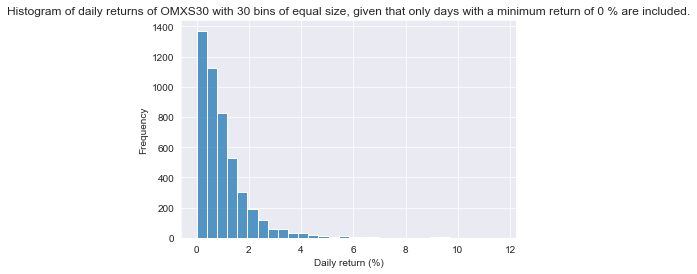

In [751]:
"""
Plots a histogram of the daily returns, given a filtered dataframe as described above.

For a histogram where only returns of a minimum (maximum) of d % are included, set label="min" ("max").

For extreme values of d (|d|>5), it may be preferred to decrease the number of bins.

To plot a histogram of the entire data, set, for example d=-np.inf and label="min". 
"""

d=0
label="min"
bins=30

def histogram(X,d,label,bins):
    if label=="min":
        X_filtered=minimum_return(X,d)
        title_="Histogram of daily returns of OMXS30 with {0} bins of equal size, given that only days with a minimum return of {1} % are included.".format(bins,d)
    elif label=="max":
        X_filtered=maximum_return(X,d)
        title_="Histogram of daily returns of OMXS30 with {0} bins of equal size, given that only days with a maximum return of {1} % are included.".format(bins,d)
    else:
        print("Invalid label")
    returns=np.array(X_filtered.iloc[:, 2])
    sns.set_style('darkgrid')
    p=sns.histplot(returns, bins=bins)
    p=p.set( xlabel = "Daily return (%)", ylabel = "Frequency",title=title_)

histogram(df,d,label,bins)